# Experimenting with YOLO!
The starter reference is [here](https://www.arunponnusamy.com/yolo-object-detection-opencv-python.html).

I used `conda install opencv` to be able to import `cv2`. It downloaded less than 230MB.

In [151]:
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The other required big file is `yolov3.weights`. It is aroud 250 MB.

In [152]:
weights_file = '/home/amin/Documents/raspbery/yolo/yolov3.weights'
image_file = '/home/amin/Documents/raspbery/yolo/t6.jpg'
classes_file = '/home/amin/Documents/raspbery/yolo/yolov3.txt'
config_file = '/home/amin/Documents/raspbery/yolo/yolov3.cfg'

image = cv2.imread(image_file)

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

# read class names from text file
classes = None
with open(classes_file) as f:
    classes = [line.strip() for line in f.readlines()]

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# read pre-trained model and config file
net = cv2.dnn.readNet(weights_file, config_file)

# create input blob 
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# set input blob for the network
net.setInput(blob)

In [153]:
# function to get the output layer names 
# in the architecture
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
    cv2.putText(img, f"{label}-{confidence:1.2}", (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [154]:
# run inference through the network
# and gather predictions from output layers
outs = net.forward(get_output_layers(net))

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

bench with confidence 1.0
person with confidence 0.98


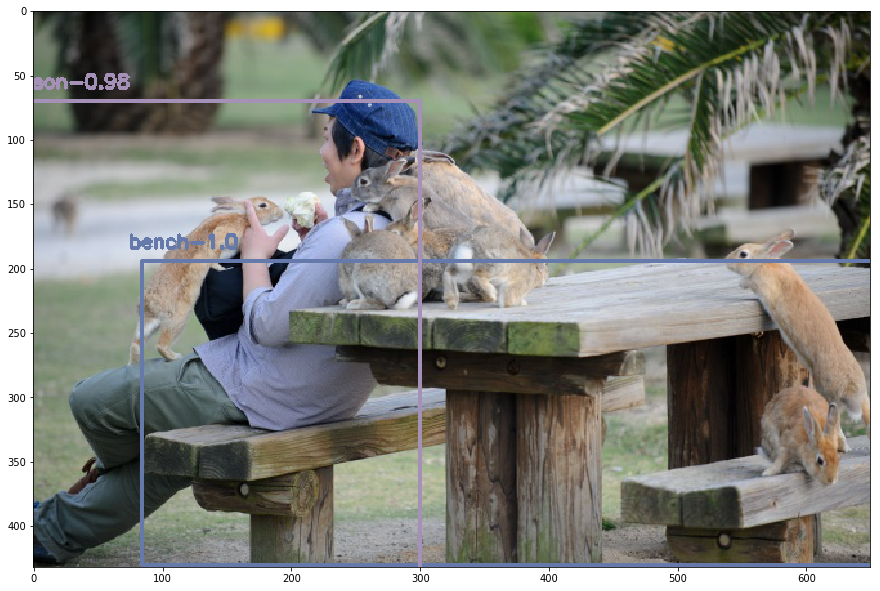

In [155]:
# apply non-max suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# go through the detections remaining
# after nms and draw bounding box
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    print(f"{classes[class_ids[i]]} with confidence {confidences[i]:1.2}")

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig2=plt.figure(figsize=[15,15])
a = plt.imshow(img)
#cv2.imwrite("object-detection.jpg", image)
